# EDA on Maryland Crash Data

In [43]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests as re

%matplotlib inline

In [44]:
maryland = pd.read_csv("marylanddf_clean.csv", low_memory = False)

In [45]:
maryland.head()

,Unnamed: 0,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,...,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [46]:
maryland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665555 entries, 0 to 665554
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             665555 non-null  int64  
 1   YEAR                   665555 non-null  int64  
 2   QUARTER                665555 non-null  object 
 3   LIGHT_DESC             642520 non-null  object 
 4   LIGHT_CODE             665555 non-null  float64
 5   COUNTY_DESC            665551 non-null  object 
 6   COUNTY_NO              665551 non-null  float64
 7   MUNI_DESC              0 non-null       float64
 8   MUNI_CODE              490165 non-null  float64
 9   JUNCTION_DESC          577189 non-null  object 
 10  JUNCTION_CODE          598197 non-null  float64
 11  COLLISION_TYPE_DESC    665555 non-null  object 
 12  COLLISION_TYPE_CODE    665555 non-null  int64  
 13  SURF_COND_DESC         596327 non-null  object 
 14  SURF_COND_CODE         598197 non-nu

In [47]:
maryland.describe()

,Unnamed: 0,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,...,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,665555.000000,665555.000000,665555.000000,665551.000000,0.0,490165.000000,598197.000000,665555.000000,598197.000000,504731.000000,...,665555.000000,6.655550e+05,665555.000000,665555.000000,532863.000000,594700.000000,579661.000000,525664.000000,665555.000000,665555.000000
mean,332777.000000,2017.429922,3.996784,12.802138,NaN,109.223621,2.659336,21.197332,2.681054,1.483862,...,6.275458,2.017498e+07,3.931861,2.135590,972.831996,4.811965,66.611606,1287.337172,39.146989,-76.744990
std,192129.323542,1.669810,13.710754,7.890507,NaN,296.811599,9.974512,29.842747,9.303266,0.803901,...,10.375600,1.669977e+04,8.559274,7.605476,1631.052868,7.172188,144.807532,1923.735560,0.309653,0.466552
min,0.000000,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.015010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,-79.996100
25%,166388.500000,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,...,6.010000,2.016063e+07,1.000000,0.000000,90.000000,0.250000,0.000000,62.000000,38.984103,-76.940814
50%,332777.000000,2017.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,...,6.010000,2.017120e+07,1.000000,0.000000,260.000000,1.670000,0.500000,360.000000,39.230493,-76.706645
75%,499165.500000,2019.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,...,6.010000,2.019052e+07,3.000000,1.000000,935.500000,6.450000,50.000000,1675.000000,39.346335,-76.575476
max,665554.000000,2020.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,...,99.000000,2.020123e+07,99.000000,99.000000,9914.000000,558.000000,1000.000000,9914.000000,39.994802,-75.000000


What we need to know from the Maryland data is where the accidents occurred (ideally we'd like to compare Montgomery County with Prince George's and Frederick Counties), what kind of fatalities or injuries were involved, and when did the accidents take place. We know from the description above that the earliest year was 2015 and the most recent is 2020.

These are coded by numbers, so we'll have to go back to the Maryland data site and establish the key to the code. The site has a dictionary for this set, and related sets, including the persons data, which includes injury information. The next step is to download that.

In [48]:
marylanddrivers = pd.read_csv("https://opendata.maryland.gov/api/views/py4c-dicf/rows.csv?accessType=DOWNLOAD", low_memory = False)
marylanddrivers.head()

,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,REPORT_NO,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR,Quarter
0,Female,F,Apparently Normal,1.0,No Injury,1,AE59920005,NaN,NaN,NaN,...,53cfb29a-b39b-4af2-85df-cf88d7215e79,MD,C,False,False,eacd0575-64e1-44f9-bd53-16449620c109,NaN,0.0,2017,Q2
1,Male,M,NaN,NaN,Non-incapacitating Injury,2,DA40650004,Right Front Seat,3.0,NaN,...,cb90b978-e091-4422-9ead-684355d3f4a8,NaN,NaN,NaN,NaN,ac456b44-041f-4a85-bedd-1a75fd5ff81a,A,1.0,2017,Q2
2,Female,F,NaN,NaN,Possible Incapacitating Injury,3,ZU7729000P,Center Rear Seat,5.0,NaN,...,c56e2fdd-fa91-4d49-bae9-aa1e9b51efbd,NaN,NaN,NaN,NaN,1b1906ca-09cb-4018-9273-9f215cb5d5d3,A,1.0,2016,Q2
3,Male,M,NaN,NaN,No Injury,1,CT8278002X,Right Rear Seat,6.0,NaN,...,aa15e7f7-e40e-4fdb-aedb-a966c71c7bc8,NaN,NaN,NaN,NaN,1cd6afef-9669-41a2-acd2-dee9af76f2c4,NaN,1.0,2018,Q3
4,Female,F,Apparently Normal,1.0,No Injury,1,DA3660000B,NaN,NaN,NaN,...,80375a09-f4bb-4d11-88c6-c399bafcc693,DC,NaN,False,False,b5e6a3b9-7e40-4d2d-98e9-ed32dee9a90c,NaN,NaN,2015,Q2


In [49]:
marylanddrivers.columns

Index(['SEX_DESC', 'SEX_CODE', 'CONDITION_DESC', 'CONDITION_CODE',
       'INJ_SEVER_DESC', 'INJ_SEVER_CODE', 'REPORT_NO', 'OCC_SEAT_POS_DESC',
       'OCC_SEAT_POS_CODE', 'PED_VISIBLE_DESC', 'PED_VISIBLE_CODE',
       'PED_OBEY_DESC', 'PED_OBEY_CODE', 'PED_TYPE_DESC', 'PED_TYPE_CODE',
       'PED_LOCATION_CODE', 'MOVEMENT_DESC', 'MOVEMENT_CODE',
       'PERSON_TYPE_DESC', 'PERSON_TYPE', 'ALCOHOL_TEST_DESC',
       'ALCOHOL_TEST_CODE', 'ALCOHOL_TESTTYPE_DESC', 'ALCOHOL_TESTTYPE_CODE',
       'DRUG_TEST_DESC', 'DRUG_TEST_CODE', 'DRUG_TESTRESULT_DESC',
       'DRUG_TESTRESULT_CODE', 'BAC_CODE', 'FAULT_FLAG_DESC', 'FAULT_FLAG',
       'EQUIP_PROB_DESC', 'EQUIP_PROB_CODE', 'SAF_EQUIP_DESC',
       'SAF_EQUIP_CODE', 'EJECT_DESC', 'EJECT_CODE', 'DATE_OF_BIRTH',
       'PERSON_ID', 'LICENSE_STATE_CODE', 'CLASS', 'CDL_FLAG_DESC', 'CDL_FLAG',
       'VEHICLE_ID', 'EMS_UNIT_LABEL', 'AIRBAG_DEPLOYED', 'YEAR', 'Quarter'],
      dtype='object')

This dataset includes information on each passenger in the vehicle. Since I'm interested in the numbers of injuries and fatalities (not the number of fatal crashes), I can view this that way. To determine the county, though, I will have to combine this with the accidents one.

In [50]:
#This command takes a long time to run, so once I save it as a csv, I'm just going to load the csv file
#marylandCrashes = maryland.merge(marylanddrivers, on = 'REPORT_NO', how = 'inner')
marylandCrashes = pd.read_csv("marylandCrashes.csv")
marylandCrashes.head()

/Users/maryglantz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (36,48,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,YEAR_x,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR_y,Quarter
0,0,0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,...,53715bb2-0082-4089-9a9e-62eabfd94dc8,NaN,NaN,False,False,3c9e8766-8b2a-4774-b85c-c645f2eabba0,NaN,0.0,2020,Q2
1,1,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,...,2a107168-e876-4624-be53-b123f41cf3ae,MD,NaN,False,False,6e506abc-74ce-46a2-b48c-2e09cdb1c20f,B,1.0,2020,Q2
2,2,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,...,9fe87418-8ebe-4ebd-9bd0-b6b16c2555c4,NaN,NaN,False,False,dd5c5d0a-2a52-4473-a33e-a7441e238b37,NaN,1.0,2020,Q2
3,3,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,...,7c40af46-a448-4759-9c87-c029dc6f9ab4,MD,NaN,False,False,d8ade674-0336-4221-a2b0-f998ae7d4f36,NaN,1.0,2020,Q2
4,4,1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,...,a488a97c-3b5c-426d-a282-00ac93517677,MD,NaN,False,False,2212f949-edeb-4183-9b28-681904096b0e,A,2.0,2020,Q2


In [51]:
# I can comment this line out now as I've saved it already and am now using it to load the data above
#marylandCrashes.to_csv("marylandCrashes.csv")

In [52]:
marylandCrashes['INJ_SEVER_DESC'].unique()

array(['No Injury', 'Possible Incapacitating Injury',
       'Non-incapacitating Injury', 'Incapacitating/Disabled Injury',
       'Fatal Injury'], dtype=object)

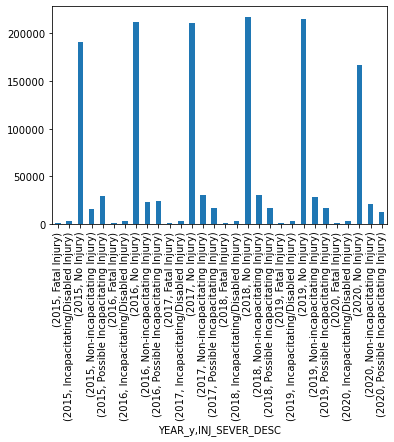

In [53]:
marylandCrashes.groupby(["YEAR_y", "INJ_SEVER_DESC" ]).size().plot(kind = 'bar')

Montgomery County had an increase of 54% in fatal crashes between 2017 and 2020, I would like to see how that compares to Maryland as a whole.

In [54]:
isFatal = marylanddrivers["INJ_SEVER_DESC"] == 'Fatal Injury'
fatalCrashes = marylanddrivers[isFatal]
fatalCrashes['INJ_SEVER_DESC']

1246       Fatal Injury
1276       Fatal Injury
1483       Fatal Injury
1617       Fatal Injury
1944       Fatal Injury
               ...     
1492709    Fatal Injury
1492970    Fatal Injury
1493442    Fatal Injury
1494941    Fatal Injury
1496073    Fatal Injury
Name: INJ_SEVER_DESC, Length: 2887, dtype: object

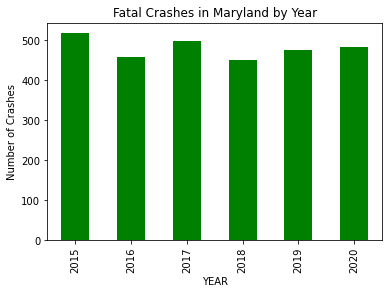

In [55]:
plt.title("Fatal Crashes in Maryland by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

fatalCrashes.groupby('YEAR').size().plot(kind = 'bar', color = 'g')

In [56]:
fatalCrashes.groupby(['YEAR']).size()

YEAR
2015    518
2016    459
2017    498
2018    452
2019    476
2020    484
dtype: int64

Fatal crashes in Maryland as a whole decreased from 498 in 2017 to 484 in 2020, a **decrease** of almost 3%.  So Montgomery County's increase does not match the pattern state-wide.  

The next logical step is to examine the rate of change (if any) in counties similar to Montgomery County:  Prince George's County and Frederick County.

Prince George's County's code is 16, Frederick's is 10, and Montgomery's is 15 (so we can compare like to like and see how Montgomery County's data according to the state compares with the other two counties according to the state).

Note:  the drivers' data does not contain county identifiers, and the crash data does not contain injury identifiers, so we need to use the merged dataset for this.  We will need the report_no, the year, the injury severity code, the county number and county names (for ease of viewing)

In [57]:
# Separate data by county
counties = [10, 16, 15]
selectedCounties = marylandCrashes[marylandCrashes.COUNTY_NO.isin(counties)] 

In [58]:
selectedCounties.head()

,Unnamed: 0,Unnamed: 0.1,YEAR_x,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR_y,Quarter
7,7,2,2020,Q2,Daylight,1.0,Montgomery,15.0,NaN,NaN,...,8ed26f24-7000-479b-9c46-1c121a413d7d,MD,C,NaN,NaN,NaN,NaN,NaN,2020,Q2
8,8,2,2020,Q2,Daylight,1.0,Montgomery,15.0,NaN,NaN,...,8481d29e-6cb7-4273-8b8c-3be0fd568757,MD,CM,False,False,dfd0574d-34a2-4dc5-aba6-18927b5a164d,NaN,1.0,2020,Q2
14,14,6,2020,Q2,Daylight,1.0,Frederick,10.0,NaN,NaN,...,13347ccd-dd05-428c-bcbb-24c450d260d6,NaN,NaN,False,False,8c9cc226-fa9e-46d3-a761-fd94ae048714,NaN,0.0,2020,Q2
15,15,7,2020,Q2,Daylight,1.0,Montgomery,15.0,NaN,NaN,...,dea573d1-c6f7-4ef3-a6a7-cf2ba4670853,MD,CDL,False,False,7ebc5c51-0470-4e52-9d5a-a0115f6280d2,NaN,1.0,2020,Q2
23,23,12,2017,Q4,Dark Lights On,3.0,Prince George's,16.0,NaN,NaN,...,8ca6fb04-6ee9-4f2d-abb8-7d7138e6efb5,MD,C,NaN,NaN,NaN,A,NaN,2017,Q4


In [59]:
# Select only the fatal crashes from these counties
isFatal2 = selectedCounties["INJ_SEVER_DESC"] == 'Fatal Injury'
fatalCrashes2 = selectedCounties[isFatal2]
fatalCrashes2['INJ_SEVER_DESC']

2768       Fatal Injury
3755       Fatal Injury
4592       Fatal Injury
6015       Fatal Injury
6378       Fatal Injury
               ...     
1488306    Fatal Injury
1489053    Fatal Injury
1489269    Fatal Injury
1489923    Fatal Injury
1491702    Fatal Injury
Name: INJ_SEVER_DESC, Length: 886, dtype: object

In [60]:
fatalCrashes2.groupby(['YEAR_x', 'COUNTY_DESC']).size()

YEAR_x  COUNTY_DESC    
2015    Frederick           22
        Montgomery          46
        Prince George's     93
2016    Frederick           14
        Montgomery          39
        Prince George's     70
2017    Frederick           26
        Montgomery          33
        Prince George's     80
2018    Frederick           17
        Montgomery          31
        Prince George's     91
2019    Frederick           24
        Montgomery          36
        Prince George's    107
2020    Frederick           21
        Montgomery          38
        Prince George's     98
dtype: int64

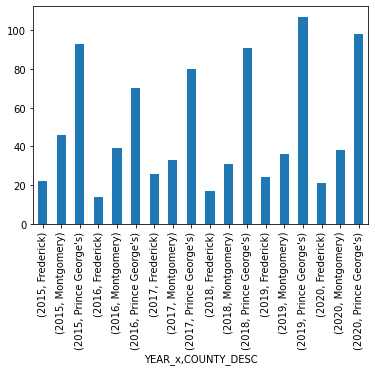

In [61]:
fatalCrashes2.groupby(['YEAR_x', 'COUNTY_DESC']).size().plot(kind='bar')


In [62]:
isMoCo = marylandCrashes['COUNTY_NO']== 15
moCoCrashes = marylandCrashes[isMoCo]
isFatalMC = moCoCrashes["INJ_SEVER_DESC"] == 'Fatal Injury'
fatalCrashesMC = moCoCrashes[isFatalMC]
fatalCrashesMC['INJ_SEVER_DESC']

isFredCo = marylandCrashes['COUNTY_NO']== 10
fredCoCrashes = marylandCrashes[isFredCo]
isFatalFC = fredCoCrashes["INJ_SEVER_DESC"] == 'Fatal Injury'
fatalCrashesFC = fredCoCrashes[isFatalFC]
fatalCrashesFC['INJ_SEVER_DESC']

isPGCo =  marylandCrashes['COUNTY_NO']== 16
pGCoCrashes =marylandCrashes[isPGCo]
isFatalPG = pGCoCrashes["INJ_SEVER_DESC"] == 'Fatal Injury'
fatalCrashesPG = pGCoCrashes[isFatalPG]
fatalCrashesPG['INJ_SEVER_DESC']

3755       Fatal Injury
6015       Fatal Injury
6378       Fatal Injury
8009       Fatal Injury
8343       Fatal Injury
               ...     
1486296    Fatal Injury
1488306    Fatal Injury
1489053    Fatal Injury
1489269    Fatal Injury
1489923    Fatal Injury
Name: INJ_SEVER_DESC, Length: 539, dtype: object

Text(0.5, 1.0, "Prince George's County Fatal Crashes")

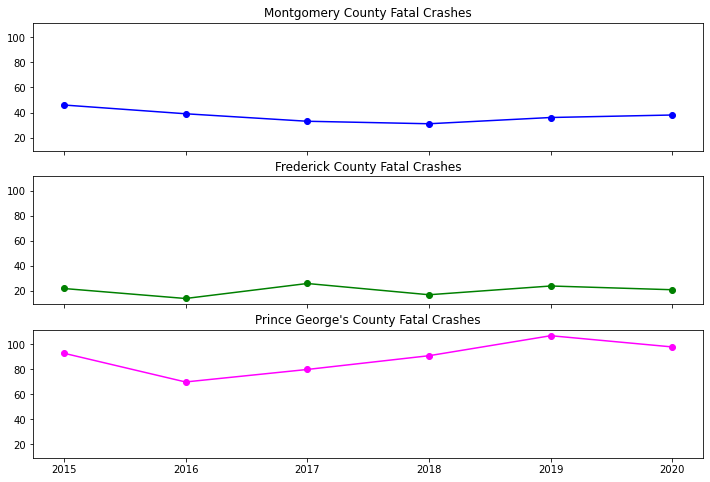

In [63]:
plt.rcParams["figure.figsize"] = [12,8]

fig, axes = plt.subplots(nrows=3, ncols = 1, sharex = True, sharey = True)

axes[0].plot(fatalCrashesMC.groupby("YEAR_x").size(), marker = 'o', color = 'blue')
axes[0].set_title("Montgomery County Fatal Crashes")

axes[1].plot(fatalCrashesFC.groupby("YEAR_x").size(), marker = 'o', color = 'green')
axes[1].set_title("Frederick County Fatal Crashes")

axes[2].plot(fatalCrashesPG.groupby("YEAR_x").size(), marker = 'o', color = 'magenta')
axes[2].set_title("Prince George's County Fatal Crashes")

### Summary of Fatal Crash Trends in Montgomery, Frederick, and Prince George's Counties:

In [64]:
fatalCrashesMC.groupby("YEAR_x").size()

YEAR_x
2015    46
2016    39
2017    33
2018    31
2019    36
2020    38
dtype: int64

In [65]:
fatalCrashesFC.groupby("YEAR_x").size()

YEAR_x
2015    22
2016    14
2017    26
2018    17
2019    24
2020    21
dtype: int64

In [66]:
fatalCrashesPG.groupby("YEAR_x").size()

YEAR_x
2015     93
2016     70
2017     80
2018     91
2019    107
2020     98
dtype: int64

From 2017 to 2020, according to the Maryland State data, fatalities in Montgomery County **increased** from 33 to 38, or approximately 15%.  In Frederick County, they **decreased** from 26 to 21, or approximately 19%.  In Prince George's County, they **increased** from 80 to 98 or approximately 18%

## Examining Severe Injuries in the State

In [67]:
isSevere = marylandCrashes['INJ_SEVER_DESC']== 'Incapacitating/Disabled Injury'
severeCrashes = marylandCrashes[isSevere]
severeCrashes.groupby('YEAR_x').size()

YEAR_x
2015    2630
2016    3084
2017    3230
2018    3122
2019    2988
2020    2618
dtype: int64

In Maryland, serious injury crashes **declined** from 3230 in 2017 to 2618 in 2020, or about 19%.

### Serious Injury Crashes in Maryland

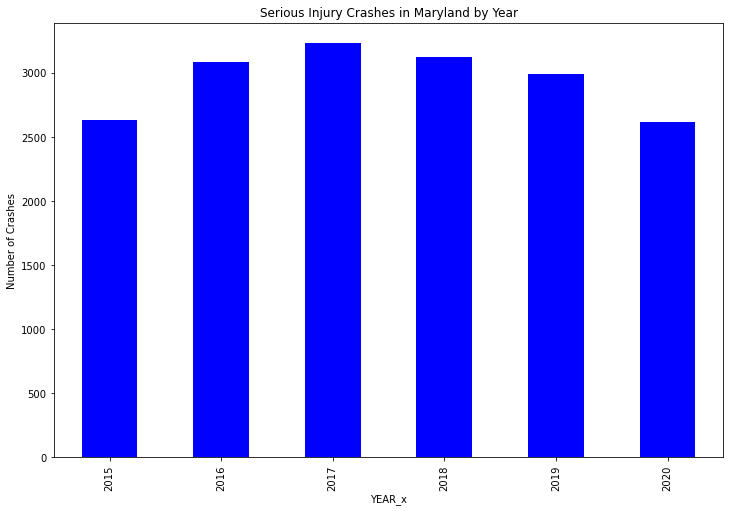

In [68]:
plt.title("Serious Injury Crashes in Maryland by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")

severeCrashes.groupby('YEAR_x').size().plot(kind = 'bar', color = 'b')

### Serious Injury Crashes in Montgomery, Frederick and Prince George's Counties

In [69]:
isSeriousMC = moCoCrashes["INJ_SEVER_DESC"] == 'Incapacitating/Disabled Injury'
seriousCrashesMC = moCoCrashes[isSeriousMC]


isSeriousFC = fredCoCrashes["INJ_SEVER_DESC"] == 'Incapacitating/Disabled Injury'
seriousCrashesFC = fredCoCrashes[isSeriousFC]


isSeriousPG = pGCoCrashes["INJ_SEVER_DESC"] == 'Incapacitating/Disabled Injury'
seriousCrashesPG = pGCoCrashes[isSeriousPG]


Text(0.5, 1.0, "Prince George's County Serious Injury Crashes")

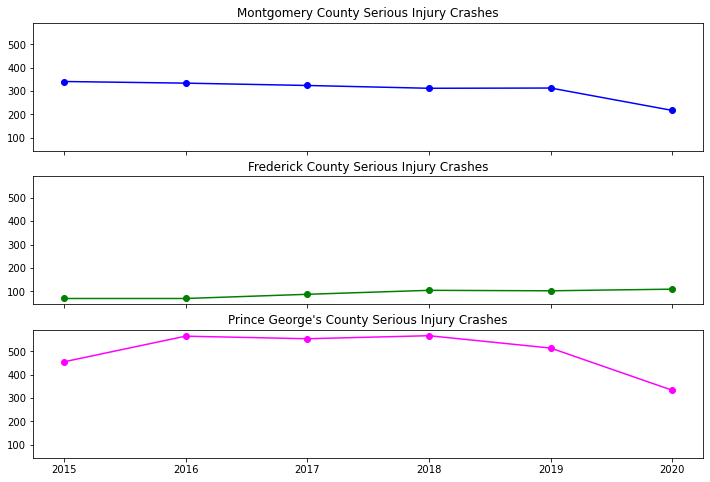

In [70]:
plt.rcParams["figure.figsize"] = [12,8]

fig, axs = plt.subplots(nrows=3, ncols = 1, sharex = True, sharey = True)

axs[0].plot(seriousCrashesMC.groupby("YEAR_x").size(), marker = 'o', color = 'blue')
axs[0].set_title("Montgomery County Serious Injury Crashes")

axs[1].plot(seriousCrashesFC.groupby("YEAR_x").size(), marker = 'o', color = 'green')
axs[1].set_title("Frederick County Serious Injury Crashes")

axs[2].plot(seriousCrashesPG.groupby("YEAR_x").size(), marker = 'o', color = 'magenta')
axs[2].set_title("Prince George's County Serious Injury Crashes")

In [71]:
seriousCrashesMC.groupby("YEAR_x").size()

YEAR_x
2015    341
2016    334
2017    324
2018    312
2019    313
2020    217
dtype: int64

In [72]:
seriousCrashesFC.groupby("YEAR_x").size()

YEAR_x
2015     69
2016     69
2017     87
2018    104
2019    102
2020    109
dtype: int64

In [73]:
seriousCrashesPG.groupby("YEAR_x").size()

YEAR_x
2015    455
2016    565
2017    554
2018    567
2019    514
2020    333
dtype: int64

From 2017 to 2020 in Montgomery County, serious injury crashes decreased from 324 to 217, or 33%.  In Frederick County, they increased from 87 to 109, or 20%.  In Prince George's County, they decreased from 554 to 333, or 

### Establish a population baseline for the counties in order to compare the **rate** of crashes

In [74]:
# Get ACS census data for three counties in Maryland (state 24)

census_pop = re.get('https://api.census.gov/data/2019/acs/acs1/?get=NAME,B01001_001E,B01002_001E,C22001_001E,B25064_001E'\
               '&for=county:031,021,033&in=state:24').json()

In [75]:
# Put in dataframe
census_pop = pd.DataFrame(census_pop)
census_pop.rename(columns=census_pop.iloc[0], inplace=True)
census_pop = census_pop.iloc[1:].rename(columns = {'B01001_001E': 'Population',
                                     'B01002_001E': 'Median Age',
                                     'C22001_001E': 'Household Poverty',
                                     'B25064_001E': 'Median Gross Rent'})


In [76]:
census_pop

,NAME,Population,Median Age,Household Poverty,Median Gross Rent,state,county
1,"Prince George's County, Maryland",909327,37.8,316361,1469,24,033
2,"Frederick County, Maryland",259547,38.7,93768,1425,24,021
3,"Montgomery County, Maryland",1050688,39.7,368897,1788,24,031


In [101]:
popMoCo = census_pop.loc[3, 'Population']
popFredCo = census_pop.loc[2, 'Population']
popPGCo = census_pop.loc[1, 'Population']

In [102]:
# Calculate number of fatal and serious injury crashes per population in 2019
scMC = seriousCrashesMC['YEAR_x'] == 2019
scMC.sum()/int(popMoCo)

0.00029790004263872814

In [103]:
scFC = seriousCrashesFC['YEAR_x'] == 2019
scFC.sum()/int(popFredCo)

0.00039299240599968406

In [104]:
scPGC = seriousCrashesPG["YEAR_x"] == 2019
scPGC.sum()/int(popPGCo)

0.0005652532037429879

In [107]:
fcMC = fatalCrashesMC['YEAR_x'] == 2019
fcMC.sum()/int(popMoCo)

3.4263263690077356e-05

In [108]:
fcFC = fatalCrashesFC['YEAR_x'] == 2019
fcFC.sum()/int(popFredCo)

9.246880141169037e-05

In [110]:
fcPGC = fatalCrashesPG['YEAR_x'] == 2019
fcPGC.sum()/int(popPGCo)

0.00011766944124610839

Calculating the **rate** of serious and fatal crashes in Montgomery, Frederick, and Prince George's Counties in 2019, it's apparent that PG county has the most serious and fatal accidents per capita.  Montgomery County actually did better than both the other counties.  